## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [13]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

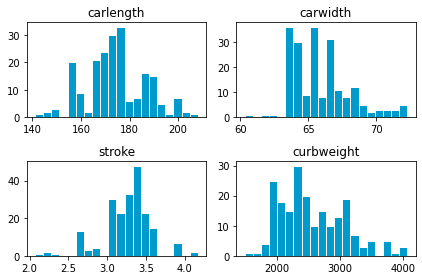

In [14]:
### Code here
car_price_df = pd.read_csv('car_price.csv')
features = ['carlength', 'carwidth', 'stroke', 'curbweight']

fig, axs = plt.subplots(2, 2)
axs = axs.flatten()

for i, feature in enumerate(features):
    axs[i].hist(car_price_df[feature], bins=20, color='#009ACD', edgecolor='white', linewidth=1)
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()


<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


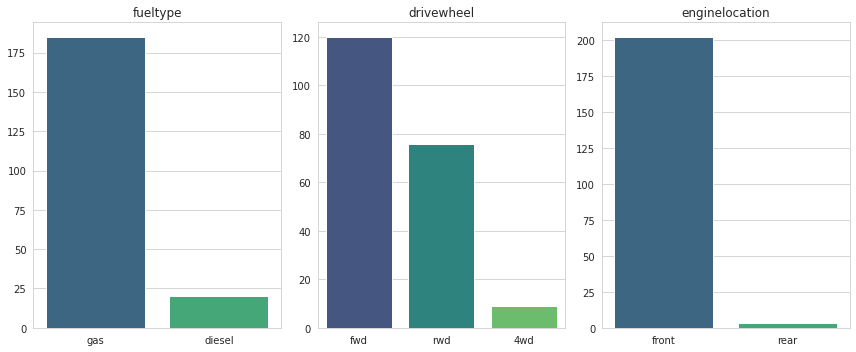

In [15]:
categories = ['fueltype', 'drivewheel', 'enginelocation']
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs = axs.flatten()

# Loop through the categorical variables and plot the bar charts
for i, category in enumerate(categories):
    counts = car_price_df[category].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axs[i], palette='viridis')
    axs[i].set_title(category)

plt.tight_layout()
plt.show()

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

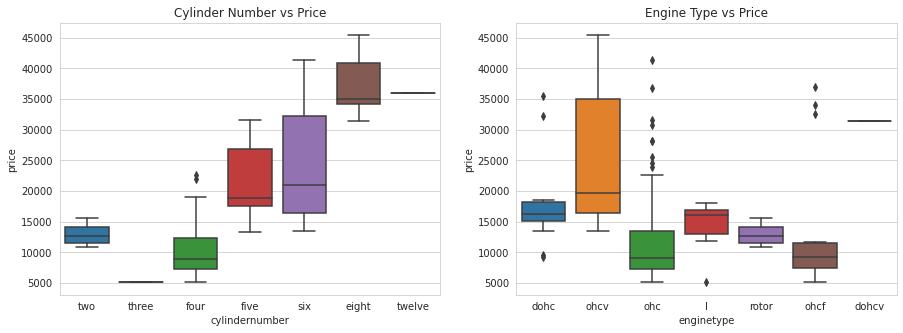

In [16]:
### Code here
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='cylindernumber', y='price', order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], data=car_price_df, ax=ax[0])
ax[0].set_title('Cylinder Number vs Price')


sns.boxplot(x='enginetype', y='price', data=car_price_df, ax=ax[1])
ax[1].set_title('Engine Type vs Price')

plt.show()



<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

In [69]:
####The visualization above depicts two boxplots that compare the distribution of automobile pricing across categories of cylinder count and engine type.
####Regarding the skewness of the distributions, the histograms of the automobile prices indicate a positive skew, implying that the tail of the distribution is towards higher prices. 

###The ohcv enginetype has the highest price, compared to the other engine types

------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
![images.jpg](attachment:images.jpg)



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [17]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0, 4, 100)
y = 7 * X - 8 + epsilon


To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

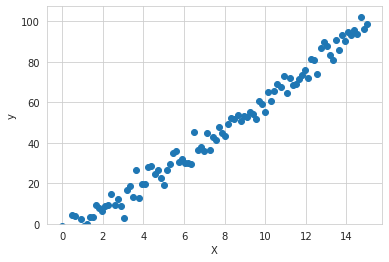

In [18]:
### Code here
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, None) # to make sure y-axis starts from 0
plt.show()

In [ ]:
#### The features are linearly correlated; as x increases, y increases proportionally. 
#Thus it is a linear relationship between the X and y features. 
#The scatter plot points are randomly dispersed about a line with a slope of 7.

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [19]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

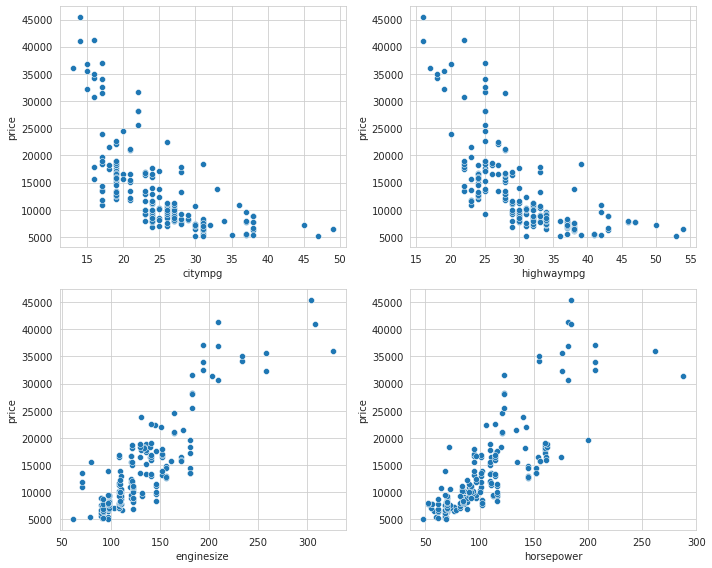

In [20]:
sns.set_style("whitegrid")

features = ['citympg', 'highwaympg', 'enginesize', 'horsepower']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='price', data=car_price_df, ax=axs[i])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('price')
    
plt.tight_layout()
plt.show()


**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [ ]:
####The visualizations suggest that linear regression may not be an appropriate model for this problem. The relationship between the label (price) and the continuous characteristics ('city MPG,' 'highway MPG,' 'engine size,' and 'horsepower') appears non-linear, with negative and positive exponential relationships. It appears that the relationship between 'citympg' and 'highwaympg' and 'price' decreases exponentially as mpg values increase, whereas the relationship between 'enginesize' and 'horsepower' and 'price' is positively correlated and increases exponentially. This problem may be better suited to alternative models, such as polynomial regression or regression with transformed variables

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [21]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [23]:
!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer

target = car_price_df['price']
encoded_df = TargetEncoder(handle_unknown='ignore').fit_transform(car_price_X, car_price_y)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.2 MB/s eta 0:00:00


**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

In [24]:
corr_matrix = encoded_df.corr().abs()

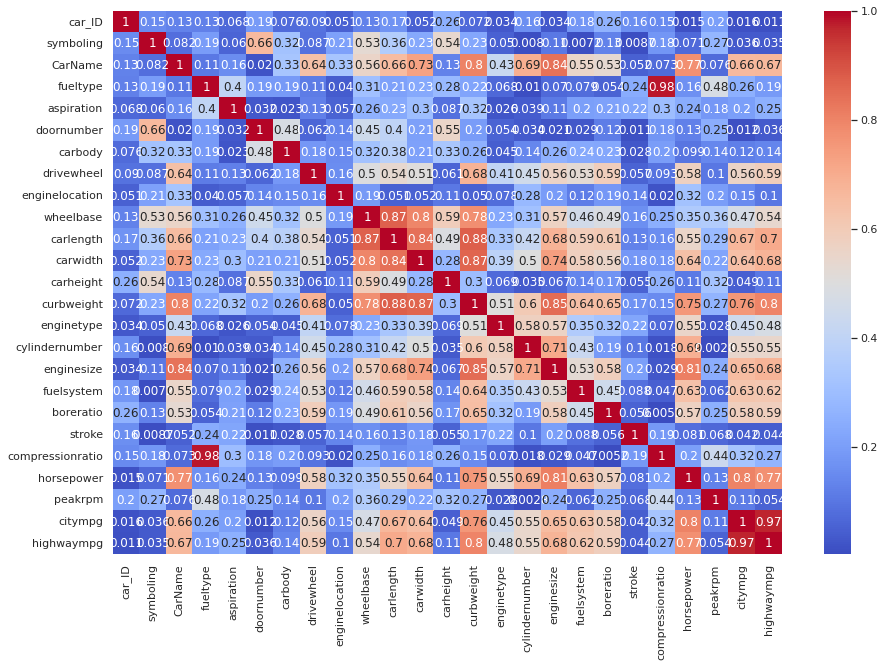

In [25]:
### Code here
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [26]:
encoded_df = encoded_df.drop(['compressionratio', 'highwaympg'], axis = 1)
len(encoded_df.columns)

23

Why we are dropping the highly correlated values: 

In [27]:
#### Highly correlated features violate linear regression's independence assumption, causing issues. The regression approach may overemphasize highly correlated features, resulting in incorrect and unstable conclusions. Highly correlated features can also generate multicollinearity, making model coefficient interpretation challenging. Thereforer to ensure a reliable linear regression model, we need to remove strongly correlated elements.

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [28]:
X = encoded_df
y = car_price_df['price']

car_price_X_dev, car_price_X_test, car_price_y_dev, car_price_y_test = train_test_split(
X, y, test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(
car_price_X_dev, car_price_y_dev, test_size=0.25, random_state=0)



**2.1.8 Standardize the columns in the feature matrices.**

In [29]:
scaler = StandardScaler()
car_price_X_train = scaler.fit_transform(car_price_X_train)
car_price_X_val = scaler.transform(car_price_X_val)
car_price_X_test = scaler.transform(car_price_X_test)



**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [30]:
### Code here
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

print(car_price_X_train[:5])

[[ 1.         -0.95500948  0.17546752 -0.3828122  -0.372678   -0.49236596
  -1.25        0.71416478 -0.78493317 -0.12856487 -0.40974726 -0.46851364
  -0.00339972 -1.15016334 -0.55669184 -0.5074834  -0.52403304 -0.43428753
  -1.28892505 -0.66854906  1.03549495 -0.09942571  0.83916558  0.00909065]
 [ 1.         -1.44488923  0.17546752  1.35737157 -0.372678   -0.49236596
   0.8         0.71416478  1.34658309 -0.12856487  0.75843946  1.19517538
   0.41476539  0.71966069  0.89378352 -0.5074834   2.36746136  0.82259167
   1.00439665 -0.08766405 -0.25186264  0.44932771 -1.77525606 -0.78958775]
 [ 1.          1.79181626 -1.48472517  0.6702315  -0.372678    2.0310096
   0.8        -0.18993655  1.34658309 -0.12856487  0.89194651  1.17845488
   0.55415375  1.43576351  1.08794163 -0.5074834  -0.52403304  0.03122329
   1.00439665  1.03780065 -0.38389932  1.52070343  0.00255066 -1.26879479]
 [ 1.         -0.64008678 -0.65462882 -0.60920741 -0.372678   -0.49236596
   0.8         0.71416478 -0.7849331

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [31]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        n_features = X.shape[1]
        identity = np.eye(n_features)
        self.w = np.linalg.solve(X.T @ X + self.alpha * identity, X.T @ y)
       # pass
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X @ self.w
        return y_pred
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [32]:
lr = LinearRegression(alpha=0)

lr.train(X_train, y_train)
y_pred = lr.predict(X_test)

print("Predictions:\n", y_pred[:3], "\n...\n", y_pred[-3:])
print("Actual labels:\n", y_test[:3], "\n...\n", y_test[-3:])


Predictions:
 [19.79646675 82.65106352 -5.34537196] 
...
 [17.70131352 27.12950304  0.94008772]
Actual labels:
 [19.75879164 87.9272395  -1.96383594] 
...
 [26.53356395 19.07681413  0.07197308]


**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

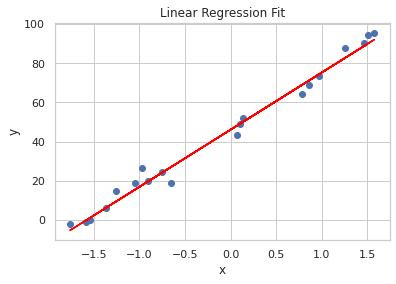

In [33]:
import matplotlib.pyplot as plt

x_vals = X_test[:, 1]
y_pred = lr.predict(X_test)
plt.scatter(x_vals, y_test)
plt.plot(x_vals, np.dot(X_test, lr.w), color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')

plt.show()


**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [34]:
lr = LinearRegression(alpha=0)

lr.train(car_price_X_train, car_price_y_train) 

train_preds = lr.predict(car_price_X_train)
val_preds = lr.predict(car_price_X_val)
test_preds = lr.predict(car_price_X_test)

train_r2 = r2_score(car_price_y_train, train_preds)
val_r2 = r2_score(car_price_y_val, val_preds)
test_r2 = r2_score(car_price_y_test, test_preds)

print("Training R^2 score:", train_r2)
print("Validation R^2 score:", val_r2)
print("Test R^2 score:", test_r2)

print("Test set predictions:\n", test_preds[:3], "\n...\n", test_preds[-3:])
print("Test set actual labels:\n", car_price_y_test[:3], "\n...\n", car_price_y_test[-3:])


Training R^2 score: 0.9689946806468002
Validation R^2 score: 0.9591736535677285
Test R^2 score: 0.9592533350879984
Test set predictions:
 [ 6173.9162588  17545.72548287 15432.32540776] 
...
 [ 6127.21503211 42285.89213592  8689.92857954]
Test set actual labels:
 52      6795.0
181    15750.0
5      15250.0
Name: price, dtype: float64 
...
 22     6377.0
74    45400.0
44     8916.5
Name: price, dtype: float64


**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [35]:
mean_train = np.mean(car_price_y_train)
baseline_preds = np.full_like(car_price_y_test, mean_train)

train_r2_baseline = r2_score(car_price_y_train, np.full_like(car_price_y_train, mean_train))
val_r2_baseline = r2_score(car_price_y_val, np.full_like(car_price_y_val, mean_train))
test_r2_baseline = r2_score(car_price_y_test, baseline_preds)

print("Baseline Training R^2 score:", train_r2_baseline)
print("Baseline Validation R^2 score:", val_r2_baseline)
print("Baseline Test R^2 score:", test_r2_baseline)


Baseline Training R^2 score: 0.0
Baseline Validation R^2 score: -0.04252409813108615
Baseline Test R^2 score: -0.0028042246944892657


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

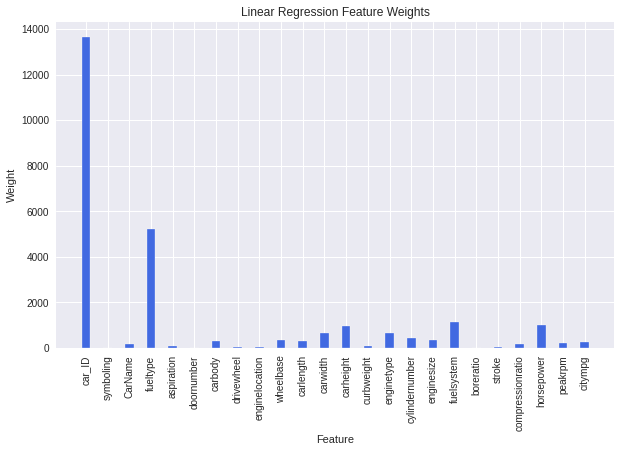

In [38]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(10, 6))

weights = lr.w.squeeze()
features = car_price_df.columns.values

plt.bar(range(len(weights)), np.abs(weights), width=0.4, color='royalblue')
plt.xticks(range(len(weights)), features, rotation=90)

plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Linear Regression Feature Weights')

plt.show()



**2.1.16 According to your model, which features are the greatest contributors to the car price?**

In [40]:
#Observing the model, car_ID and fueltype are the biggest contibutors to the car price. 

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

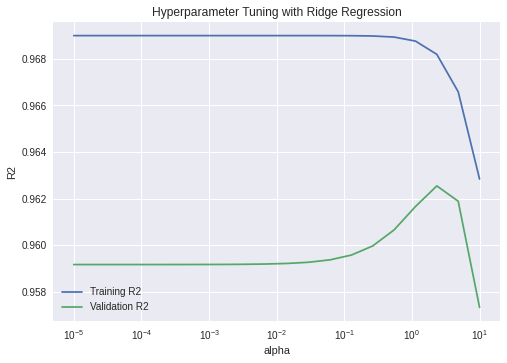

In [41]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-5, 1, 20)
train_r2_scores = []
val_r2_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(car_price_X_train, car_price_y_train)
    train_r2_scores.append(model.score(car_price_X_train, car_price_y_train))
    val_r2_scores.append(model.score(car_price_X_val, car_price_y_val))

plt.plot(alphas, train_r2_scores, label='Training R2')
plt.plot(alphas, val_r2_scores, label='Validation R2')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('Hyperparameter Tuning with Ridge Regression')
plt.legend()
plt.show()



**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [42]:
####   The blue line shows the R^2 score on the training data, the green line represents the R^2 score on the validation data.
#### As alpha increases, model complexity decreases and the regularization term becomes more important. Since the model is trained using training data, the training R^2 score remains roughly constant as model complexity lowers. As complexity lowers, the model becomes too simplistic to accurately capture data patterns, lowering R^2.
### Green linee - Validation R^2 score starts low and rises with model complexity. Complex models fit training data well but overfit and perform badly on validation data. As the model becomes too sophisticated and overfits the training data, the validation R^2 score decreases.

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [43]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [44]:
heart_disease_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [47]:
####Removing is the option, because if the dataset is small, we can remove missing rows. Missing rows reduce data for analysis.

###If there are only a few missing columns, we can remove them. This may reduce data for analysis if these columns are important.

####Estimating missing values. Regression, k-nearest neighbors, or the mean or median of the non-missing values in that column can do this.

In [46]:
#we can estimate/impute missing values:
heart_disease_df = heart_disease_df.fillna(heart_disease_df.median())


**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

In [48]:
heart_disease_df['TenYearCHD'].value_counts(normalize=True)


0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

In [ ]:
####The percentage of positive cases (patients with a 10-year risk of CHD) is only 15.27%, while the percentage of negative cases (patients without a 10-year risk of CHD) is 84.73%. The labels are imbalanced, andt there are significantly more negative cases than positive ones.

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

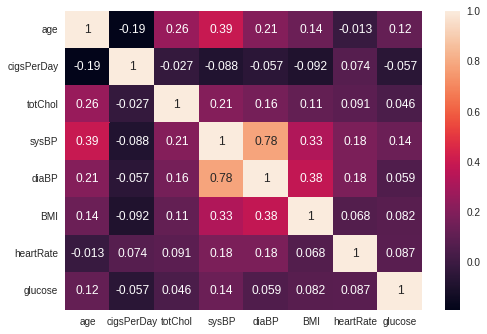

In [49]:
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
corr_matrix = heart_disease_df[num_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [50]:
#dropping highly correlated:
highly_correlated = set() 
for i in range(len(num_features)):
    for j in range(i+1, len(num_features)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) >= 0.9:
            print(f"{num_features[i]} and {num_features[j]} are highly correlated ({corr:.2f})")
            highly_correlated.add(num_features[i])
            highly_correlated.add(num_features[j])
            
heart_disease_df = heart_disease_df.drop(columns=highly_correlated)


**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [51]:
labels = np.array(heart_disease_df['TenYearCHD'])
hrt_features = heart_disease_df.drop(columns=['TenYearCHD'])

In [52]:
labels = labels.reshape(-1,1)
labels.shape

(4238, 1)

In [53]:
heart_X_dev, heart_X_test, heart_y_dev, heart_y_test = train_test_split(hrt_features, labels, test_size=0.2, random_state=0)

heart_X_train, heart_X_val, heart_y_train, heart_y_val = train_test_split(heart_X_dev, heart_y_dev, test_size=0.25, random_state=0)

In [54]:
scaler = StandardScaler()
heart_X_train = scaler.fit_transform(heart_X_train)
heart_X_val = scaler.transform(heart_X_val)
heart_X_test = scaler.transform(heart_X_test)

In [55]:
#adding a column 
heart_X_train = np.hstack([np.ones((heart_X_train.shape[0], 1)), heart_X_train])
heart_X_val = np.hstack([np.ones((heart_X_val.shape[0], 1)), heart_X_val])
heart_X_test = np.hstack([np.ones((heart_X_test.shape[0], 1)), heart_X_test])

heart_X_train.shape


(2542, 16)

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [56]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

In [57]:
logreg = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = logreg.train(heart_X_train, heart_y_train)


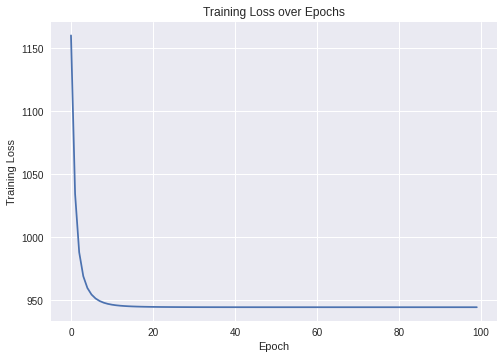

In [59]:
plt.plot(np.array(losses).squeeze())
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()


In [60]:
from sklearn.metrics import accuracy_score

alphas = np.linspace(0, 1, 100)
etas = np.linspace(0, 0.001, 100)
ts = np.arange(1, 101)

best_alpha = 0
best_eta = 0
best_t = 0
best_val_acc = 0

for i in range(20):
    alpha = np.random.choice(alphas)
    eta = np.random.choice(etas)
    t = np.random.choice(ts)
    
    lr = LogisticRegression(alpha=alpha, t=t, eta=eta)
    losses = lr.train(heart_X_train, heart_y_train)
    
    y_pred = lr.predict(heart_X_val)
    val_acc = accuracy_score(heart_y_val, y_pred)
    
    if val_acc > best_val_acc:
        best_alpha = alpha
        best_eta = eta
        best_t = t
        best_val_acc = val_acc
        
    print(f"Iteration {i+1}: alpha={alpha:.3f}, eta={eta:.5f}, t={t}, validation accuracy={val_acc:.3f}")

print(f"\nBest hyperparameters: alpha={best_alpha:.3f}, eta={best_eta:.5f}, t={best_t}, validation accuracy={best_val_acc:.3f}")

lr = LogisticRegression(alpha=best_alpha, t=best_t, eta=best_eta)
losses = lr.train(heart_X_train, heart_y_train)


y_pred = lr.predict(heart_X_test)
test_acc = accuracy_score(heart_y_test, y_pred)
print(f"Test accuracy with best hyperparameters: {test_acc:.3f}")



Iteration 1: alpha=0.323, eta=0.00071, t=86, validation accuracy=0.855
Iteration 2: alpha=0.313, eta=0.00013, t=72, validation accuracy=0.855
Iteration 3: alpha=0.566, eta=0.00024, t=80, validation accuracy=0.855
Iteration 4: alpha=0.414, eta=0.00018, t=41, validation accuracy=0.855
Iteration 5: alpha=0.545, eta=0.00080, t=12, validation accuracy=0.855
Iteration 6: alpha=0.384, eta=0.00094, t=2, validation accuracy=0.847
Iteration 7: alpha=0.960, eta=0.00044, t=89, validation accuracy=0.855
Iteration 8: alpha=0.242, eta=0.00068, t=83, validation accuracy=0.855
Iteration 9: alpha=0.030, eta=0.00077, t=36, validation accuracy=0.855
Iteration 10: alpha=0.869, eta=0.00062, t=70, validation accuracy=0.855
Iteration 11: alpha=0.879, eta=0.00043, t=33, validation accuracy=0.855
Iteration 12: alpha=0.111, eta=0.00085, t=11, validation accuracy=0.855
Iteration 13: alpha=0.545, eta=0.00037, t=29, validation accuracy=0.856
Iteration 14: alpha=0.020, eta=0.00027, t=84, validation accuracy=0.854
It

**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

In [61]:
#### In this instance, the test accuracy is 0.843, which is a relatively high value considering the highly unbalanced nature of the dataset. 
####Depending on the application, it may be more critical to accurately identify positive instances (individuals having a 10-year risk of CHD) than to correctly identify negative cases (people without a 10-year risk of CHD). 
####Therefore, it is important to also evaluate the model's performance in terms of precision, which give us a better understanding of how well the model is doing for each class.

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

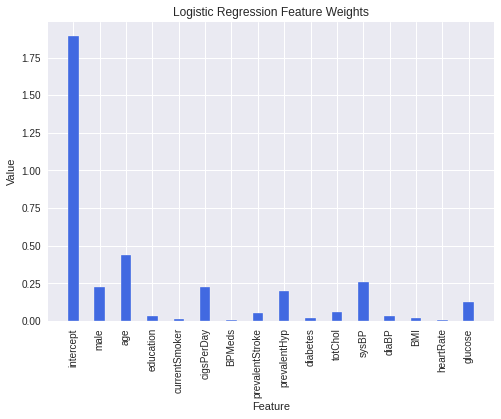

In [62]:
# get weights and feature names
weights = lr.w.squeeze()
features = ['intercept', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP',
            'BMI', 'heartRate', 'glucose']

# create bar plot
plt.bar(range(len(weights)), np.abs(weights), width=0.4, color='royalblue')

# set tick labels to feature names
plt.xticks(range(len(weights)), features, rotation=90)

plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Logistic Regression Feature Weights')

plt.show()

In [63]:
#### Here the biggest contributing factors are the intercept and the age, those affect the predictions the most in the model


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_primal = SVC(kernel='linear')
svm_primal.fit(heart_X_train, heart_y_train)

y_train_pred = svm_primal.predict(heart_X_train)
y_val_pred = svm_primal.predict(heart_X_val)
y_test_pred = svm_primal.predict(heart_X_test)

train_acc = accuracy_score(heart_y_train, y_train_pred)
val_acc = accuracy_score(heart_y_val, y_val_pred)
test_acc = accuracy_score(heart_y_test, y_test_pred)

print(f"Primal SVM training accuracy: {train_acc:.3f}")
print(f"Primal SVM validation accuracy: {val_acc:.3f}")
print(f"Primal SVM test accuracy: {test_acc:.3f}")


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Primal SVM training accuracy: 0.852
Primal SVM validation accuracy: 0.846
Primal SVM test accuracy: 0.837


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_dual = SVC(kernel='rbf')
svm_dual.fit(heart_X_train, heart_y_train)

y_train_pred = svm_dual.predict(heart_X_train)
y_val_pred = svm_dual.predict(heart_X_val)
y_test_pred = svm_dual.predict(heart_X_test)

train_acc = accuracy_score(heart_y_train, y_train_pred)
val_acc = accuracy_score(heart_y_val, y_val_pred)
test_acc = accuracy_score(heart_y_test, y_test_pred)

print(f"Dual SVM training accuracy: {train_acc:.3f}")
print(f"Dual SVM validation accuracy: {val_acc:.3f}")
print(f"Dual SVM test accuracy: {test_acc:.3f}")


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dual SVM training accuracy: 0.858
Dual SVM validation accuracy: 0.847
Dual SVM test accuracy: 0.837
